In [1]:
#importing needed packages
import pandas as pd
import numpy as np
import json
import requests
import folium
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#business search

#setup API request parameters
api_key = "pmWpV19lfTFDnKZMpv1ymFN4zD2ngvHNHtEW80IrH1R0m_MvDzx0mYovXfe_n-q0_D2wYawVzzw9pX3pWyCmvb9osF1uMEOE_ExHUY9fpfQgZVnARt7hsg7eSTg4ZHYx"

url = "https://api.yelp.com/v3/businesses/search"
params = {
    'term': 'restaurants',
    'location': 'New York City',
    'radius' : 20000,
    'categories' : 'bars',
    'price' : 2,
    'sort_by' : 'rating',
    'limit': 30
}




headers = {'Authorization': 'Bearer ' + api_key}


response = requests.get(url, headers=headers, params=params)

data = json.loads(response.text)

df = pd.DataFrame(data['businesses'])


print(df.head())

                       id                                    alias  \
0  NWrMq1iqMDlvy8-8XuLIog                       chasers-new-york-2   
1  --FoSeUBHQb_p6iTntY4KA               stafili-wine-cafe-new-york   
2  s2CBMRYfJFu3FF6kiAsc4Q                    cruz-del-sur-brooklyn   
3  aX_QoLQab0UXhI_TtAv0Mg  vinnies-all-star-bar-and-grill-harrison   
4  c8wkoGg9UbF55k3Z74X0Qw                           betty-new-york   

                            name  \
0                        Chasers   
1              Stafili Wine Cafe   
2                   Cruz Del Sur   
3  Vinnie's All-Star Bar & Grill   
4                          Betty   

                                           image_url  is_closed  \
0  https://s3-media2.fl.yelpcdn.com/bphoto/UYV0hD...      False   
1  https://s3-media4.fl.yelpcdn.com/bphoto/aBpSo_...      False   
2  https://s3-media4.fl.yelpcdn.com/bphoto/6N_epo...      False   
3  https://s3-media2.fl.yelpcdn.com/bphoto/jM3Kuv...      False   
4  https://s3-media1.fl.yel

In [30]:
api_key = "pmWpV19lfTFDnKZMpv1ymFN4zD2ngvHNHtEW80IrH1R0m_MvDzx0mYovXfe_n-q0_D2wYawVzzw9pX3pWyCmvb9osF1uMEOE_ExHUY9fpfQgZVnARt7hsg7eSTg4ZHYx"

url = "https://api.yelp.com/v3/businesses/chasers-new-york-2"

headers = {'Authorization': 'Bearer ' + api_key}

response = requests.get(url, headers=headers)

data = json.loads(response.text)

df2 = pd.DataFrame(data['businesses'])

print(response.text)

KeyError: 'businesses'

In [4]:
#convert dataframe to excel

df.to_excel('capstone_restaurants.xlsx', index=False)

#read excel into dataframe
df = pd.read_excel('capstone_restaurants.xlsx')

In [3]:
# display the first 10 rows of the data frame
print(df.head(10))

                       id                                       alias  \
0  NWrMq1iqMDlvy8-8XuLIog                          chasers-new-york-2   
1  --FoSeUBHQb_p6iTntY4KA                  stafili-wine-cafe-new-york   
2  s2CBMRYfJFu3FF6kiAsc4Q                       cruz-del-sur-brooklyn   
3  aX_QoLQab0UXhI_TtAv0Mg     vinnies-all-star-bar-and-grill-harrison   
4  c8wkoGg9UbF55k3Z74X0Qw                              betty-new-york   
5  w9I5sGHkwOyLe1yFQ0XBeg                silver-light-tavern-brooklyn   
6  gHwWrFziJ78KGHy4wgviBg  olde-city-cheesesteaks-and-brew-new-york-3   
7  s6yOBS18MWOT-dpYFEDhxg                   the-king-of-fish-brooklyn   
8  VLGmFHE4s0Sfu0piMVQa1Q      hold-fast-kitchen-and-spirits-new-york   
9  lNP1km2kaEtlsBw2VNHHhQ                        tap-haus-33-new-york   

                            name  \
0                        Chasers   
1              Stafili Wine Cafe   
2                   Cruz Del Sur   
3  Vinnie's All-Star Bar & Grill   
4               

In [3]:
#create organized dataframe

pd.DataFrame.from_dict(pd.json_normalize(response.json()['businesses']), orient='columns')

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,coordinates.latitude,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address
0,NWrMq1iqMDlvy8-8XuLIog,chasers-new-york-2,Chasers,https://s3-media2.fl.yelpcdn.com/bphoto/UYV0hD...,False,https://www.yelp.com/biz/chasers-new-york-2?ad...,10,"[{'alias': 'pubs', 'title': 'Pubs'}, {'alias':...",5.0,[delivery],...,40.720352,-73.905469,6065 Flushing Ave,,,New York,11378,US,NY,"[6065 Flushing Ave, New York, NY 11378]"
1,--FoSeUBHQb_p6iTntY4KA,stafili-wine-cafe-new-york,Stafili Wine Cafe,https://s3-media4.fl.yelpcdn.com/bphoto/aBpSo_...,False,https://www.yelp.com/biz/stafili-wine-cafe-new...,49,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",5.0,"[pickup, delivery]",...,40.737405,-74.006585,796 Greenwich St,None,,New York,10014,US,NY,"[796 Greenwich St, New York, NY 10014]"
2,s2CBMRYfJFu3FF6kiAsc4Q,cruz-del-sur-brooklyn,Cruz Del Sur,https://s3-media4.fl.yelpcdn.com/bphoto/6N_epo...,False,https://www.yelp.com/biz/cruz-del-sur-brooklyn...,59,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...",5.0,"[pickup, restaurant_reservation, delivery]",...,40.679870,-73.964352,622 Washington Ave,None,,Brooklyn,11238,US,NY,"[622 Washington Ave, Brooklyn, NY 11238]"
3,aX_QoLQab0UXhI_TtAv0Mg,vinnies-all-star-bar-and-grill-harrison,Vinnie's All-Star Bar & Grill,https://s3-media2.fl.yelpcdn.com/bphoto/jM3Kuv...,False,https://www.yelp.com/biz/vinnies-all-star-bar-...,42,"[{'alias': 'portuguese', 'title': 'Portuguese'...",5.0,[delivery],...,40.745587,-74.148878,215 Manor Ave,,,Harrison,07029,US,NJ,"[215 Manor Ave, Harrison, NJ 07029]"
4,c8wkoGg9UbF55k3Z74X0Qw,betty-new-york,Betty,https://s3-media1.fl.yelpcdn.com/bphoto/cyj4EA...,False,https://www.yelp.com/biz/betty-new-york?adjust...,24,"[{'alias': 'newamerican', 'title': 'American (...",5.0,"[pickup, delivery]",...,40.713670,-73.987850,193 Henry St,None,,New York,10002,US,NY,"[193 Henry St, New York, NY 10002]"
5,w9I5sGHkwOyLe1yFQ0XBeg,silver-light-tavern-brooklyn,Silver Light Tavern,https://s3-media2.fl.yelpcdn.com/bphoto/GvAqFa...,False,https://www.yelp.com/biz/silver-light-tavern-b...,105,"[{'alias': 'breakfast_brunch', 'title': 'Break...",5.0,[delivery],...,40.717470,-73.950050,689 Lorimer St,None,,Brooklyn,11211,US,NY,"[689 Lorimer St, Brooklyn, NY 11211]"
6,gHwWrFziJ78KGHy4wgviBg,olde-city-cheesesteaks-and-brew-new-york-3,Olde City Cheesesteaks & Brew,https://s3-media2.fl.yelpcdn.com/bphoto/Rxuxtq...,False,https://www.yelp.com/biz/olde-city-cheesesteak...,23,"[{'alias': 'sportsbars', 'title': 'Sports Bars...",5.0,"[pickup, delivery]",...,40.743676,-73.986212,66 Madison Ave,None,,New York,10016,US,NY,"[66 Madison Ave, New York, NY 10016]"
7,s6yOBS18MWOT-dpYFEDhxg,the-king-of-fish-brooklyn,The King of Fish,https://s3-media2.fl.yelpcdn.com/bphoto/ojJ2TW...,False,https://www.yelp.com/biz/the-king-of-fish-broo...,87,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.5,"[pickup, delivery]",...,40.647500,-74.007620,4515 5AV,None,,Brooklyn,11220,US,NY,"[4515 5AV, Brooklyn, NY 11220]"
8,VLGmFHE4s0Sfu0piMVQa1Q,hold-fast-kitchen-and-spirits-new-york,Hold Fast Kitchen & Spirits,https://s3-media4.fl.yelpcdn.com/bphoto/2a8BP3...,False,https://www.yelp.com/biz/hold-fast-kitchen-and...,580,"[{'alias': 'newamerican', 'title': 'American (...",4.5,"[pickup, delivery]",...,40.760640,-73.990230,364 W 46th St,None,,New York,10036,US,NY,"[364 W 46th St, New York, NY 10036]"
9,lNP1km2kaEtlsBw2VNHHhQ,tap-haus-33-new-york,Tap Haus 33,https://s3-media1.fl.yelpcdn.com/bphoto/5e5UwE...,False,https://www.yelp.com/biz/tap-haus-33-new-york?...,289,"[{'alias': 'sportsbars', 'title': 'Sports Bars...",4.5,[delivery],...,40.747247,-73.984300,14 E 33rd St,None,,New York,10016,US,NY,"[14 E 33rd St, New York, NY 10016]"


In [6]:
#looking at datatypes
df.dtypes

id                object
alias             object
name              object
image_url         object
is_closed           bool
url               object
review_count       int64
categories        object
rating           float64
coordinates       object
transactions      object
price             object
location          object
phone            float64
display_phone     object
distance         float64
dtype: object

In [37]:
#looking at restaurant categories
print(df['categories'])

0     [{'alias': 'pubs', 'title': 'Pubs'}, {'alias':...
1     [{'alias': 'wine_bars', 'title': 'Wine Bars'},...
2     [{'alias': 'mexican', 'title': 'Mexican'}, {'a...
3     [{'alias': 'portuguese', 'title': 'Portuguese'...
4     [{'alias': 'newamerican', 'title': 'American (...
5     [{'alias': 'breakfast_brunch', 'title': 'Break...
6     [{'alias': 'sportsbars', 'title': 'Sports Bars...
7     [{'alias': 'seafood', 'title': 'Seafood'}, {'a...
8     [{'alias': 'newamerican', 'title': 'American (...
9     [{'alias': 'sportsbars', 'title': 'Sports Bars...
10    [{'alias': 'chocolate', 'title': 'Chocolatiers...
11    [{'alias': 'gastropubs', 'title': 'Gastropubs'...
12    [{'alias': 'cocktailbars', 'title': 'Cocktail ...
13    [{'alias': 'bars', 'title': 'Bars'}, {'alias':...
14    [{'alias': 'bars', 'title': 'Bars'}, {'alias':...
15    [{'alias': 'szechuan', 'title': 'Szechuan'}, {...
16    [{'alias': 'cocktailbars', 'title': 'Cocktail ...
17    [{'alias': 'bars', 'title': 'Bars'}, {'ali

In [4]:
df.columns

Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'price',
       'location', 'phone', 'display_phone', 'distance'],
      dtype='object')

In [9]:
df['review_count'].value_counts()

42     2
23     2
58     2
10     1
602    1
217    1
110    1
758    1
43     1
26     1
73     1
268    1
131    1
250    1
29     1
240    1
95     1
49     1
335    1
380    1
289    1
580    1
87     1
105    1
24     1
59     1
32     1
Name: review_count, dtype: int64

In [10]:
df.sort_values('distance', axis = 0, ascending = True, inplace = True)
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
4,c8wkoGg9UbF55k3Z74X0Qw,betty-new-york,Betty,https://s3-media1.fl.yelpcdn.com/bphoto/cyj4EA...,False,https://www.yelp.com/biz/betty-new-york?adjust...,24,"[{'alias': 'newamerican', 'title': 'American (...",5.0,"{'latitude': 40.71367, 'longitude': -73.98785}","[pickup, delivery]",$$,"{'address1': '193 Henry St', 'address2': None,...",+16465565081,(646) 556-5081,1049.591926
12,4DInnPhOyvXFbYpUdO0SMQ,antidote-brooklyn-2,Antidote,https://s3-media1.fl.yelpcdn.com/bphoto/BLX5aF...,False,https://www.yelp.com/biz/antidote-brooklyn-2?a...,335,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.5,"{'latitude': 40.714253413118925, 'longitude': ...","[pickup, delivery]",$$,"{'address1': '66 S 2nd St', 'address2': '', 'a...",+17187822585,(718) 782-2585,1412.627530
17,nsnPyoDYc_fYCxZfgKdzmw,82-stanton-new-york-6,82 Stanton,https://s3-media2.fl.yelpcdn.com/bphoto/XXSewY...,False,https://www.yelp.com/biz/82-stanton-new-york-6...,29,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",4.5,"{'latitude': 40.721701, 'longitude': -73.988817}","[pickup, delivery]",$$,"{'address1': '82 Stanton St', 'address2': '', ...",+19172617595,(917) 261-7595,1827.300927
5,w9I5sGHkwOyLe1yFQ0XBeg,silver-light-tavern-brooklyn,Silver Light Tavern,https://s3-media2.fl.yelpcdn.com/bphoto/GvAqFa...,False,https://www.yelp.com/biz/silver-light-tavern-b...,105,"[{'alias': 'breakfast_brunch', 'title': 'Break...",5.0,"{'latitude': 40.71747, 'longitude': -73.95005}",[delivery],$$,"{'address1': '689 Lorimer St', 'address2': Non...",+17189630384,(718) 963-0384,2711.060996
21,OkiPb6gNNRmcbB4zIIMx0g,big-tiny-brooklyn-4,Big Tiny,https://s3-media3.fl.yelpcdn.com/bphoto/7JO0Zk...,False,https://www.yelp.com/biz/big-tiny-brooklyn-4?a...,73,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",4.5,"{'latitude': 40.6834507, 'longitude': -73.992855}","[pickup, delivery]",$$,"{'address1': '244 Smith St', 'address2': '', '...",,,2858.615422


In [5]:
#Retrieve the Latitude and Longitude from the Yelp Response
lat_long = response.json()['region']['center']
lat = lat_long['latitude']
long = lat_long['longitude']

#Create a map of the area
yelp_map = folium.Map([lat, long])
yelp_map

In [6]:
folium.Marker?

In [7]:
#plotting restaurants on map
for row in df.index:
    lat_long = df['coordinates'][row]
    lat = lat_long['latitude']
    long = lat_long['longitude']
    name = df['name'][row]
    rating = df['rating'][row]
    price = df['price'][row]
    details = '{} Price: {} Rating:{}'.format(name,price,rating)
    marker = folium.Marker([lat, long], popup=details)
    marker.add_to(yelp_map)
yelp_map

In [19]:
#cat_string = df['categories'] # 👉️ String

#df['split_str'] = df['categories'].astype(str).str.split[1] # 👉️ Split String by Whitespace

#s_word = split_str[4] # 👉️ Get The Second Word

#print(s_word)

Text(0.5, 0, 'Category')

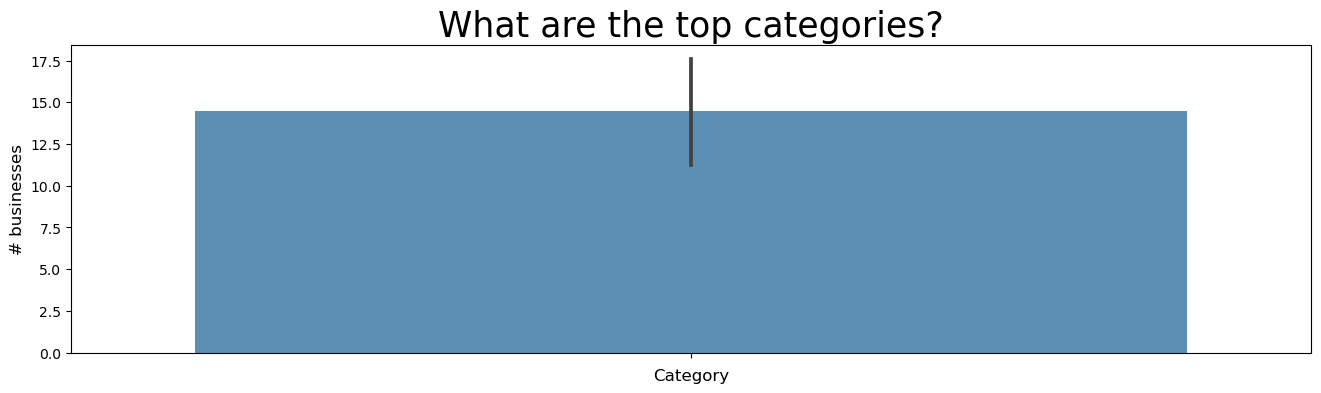

In [33]:
business_cats = ''.join(df['categories'].astype('str'))

cats=pd.DataFrame(business_cats.split(','),columns=['categories'])

#prep for chart
x=cats.categories.value_counts()

x=x.sort_values(ascending=False)
x=x.iloc[0:30]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(y = df.index, alpha=0.8), #color=color[5]
plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)